<a href="https://colab.research.google.com/github/sultanardia/House-Prices---Advanced-Regression-Techniques/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [99]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Kaggle 1/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


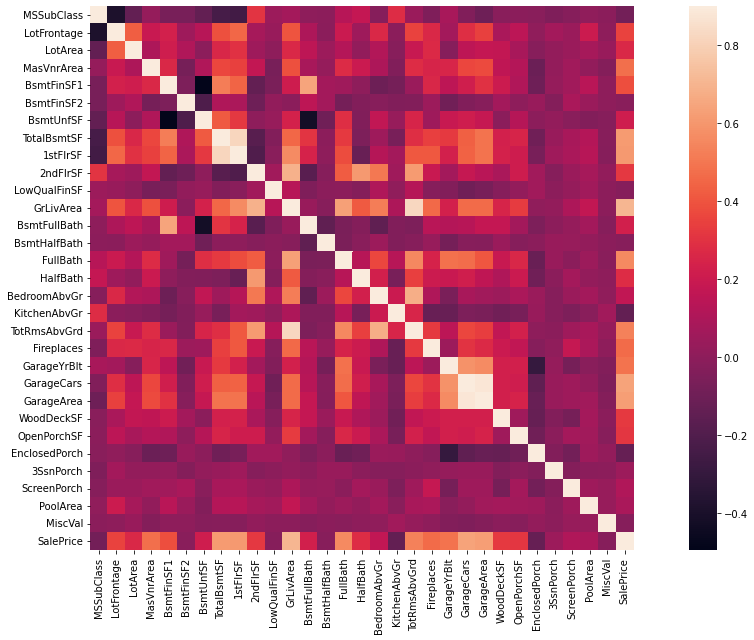

In [100]:
num_feats = df.dtypes[df.dtypes != 'object'].index
num_feats = num_feats.drop(['Id', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold'])

corr = df[num_feats].corr()

plt.subplots(figsize = (20, 10))
sns.heatmap(corr, vmax = 0.9, square = True)

In [101]:
df[num_feats].head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,208500
1,20,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,181500
2,60,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,223500
3,70,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,140000
4,60,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,250000


In [102]:
correlated_w_SalePrice = corr[corr >= 0.5].SalePrice.dropna()
correlated_w_SalePrice

TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [103]:
non_object_feats = df[correlated_w_SalePrice.index]
non_object_feats.shape

(1460, 8)

In [104]:
Q1 = non_object_feats.quantile(.25)
Q3 = non_object_feats.quantile(.75)
IQR = Q3 - Q1

non_outliers = non_object_feats[~(non_object_feats < (Q1 - 1.5 * IQR)) | (non_object_feats > (Q3 + 1.5 * IQR))]
non_outliers.dropna(axis = 0, inplace = True)
indices_of_non_outlier = non_outliers.index

In [105]:
dropped_col = num_feats.drop(correlated_w_SalePrice.index)
df.drop(dropped_col, axis = 1, inplace = True)

In [119]:
df_final = df.loc[indices_of_non_outlier]
df_final.head()

,Id,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,0.140098,GasA,Ex,Y,SBrkr,0.119780,0.259231,0.666667,Gd,0.500000,Typ,NaN,Attchd,RFn,0.50,0.386460,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,0.206547,GasA,Ex,Y,SBrkr,0.212942,0.174830,0.666667,TA,0.333333,Typ,TA,Attchd,RFn,0.50,0.324401,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,0.150573,GasA,Ex,Y,SBrkr,0.134465,0.273549,0.666667,Gd,0.333333,Typ,TA,Attchd,RFn,0.50,0.428773,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,0.123732,GasA,Gd,Y,SBrkr,0.143873,0.260550,0.333333,Gd,0.416667,Typ,Gd,Detchd,Unf,0.75,0.452750,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,0.187398,GasA,Ex,Y,SBrkr,0.186095,0.351168,0.666667,Gd,0.583333,Typ,TA,Attchd,RFn,0.75,0.589563,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal,250000


In [115]:
# df_final.fillna(, inplace = True)

In [116]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaling_columns = correlated_w_SalePrice.index.drop('SalePrice')
df[scaling_columns] = scaler.fit_transform(df[scaling_columns])

In [124]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

object_cols = df.dtypes[df.dtypes == 'object'].index

for col in object_cols:
    df_final[col].fillna('None', inplace = True)
    df_final[col] = LE.fit_transform(df_final[col])

df_final.head()

,Id,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,3,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,11,13,1,2,4,2,2,3,3,2,6,0.140098,0,0,1,5,0.119780,0.259231,0.666667,2,0.500000,6,3,1,2,0.50,0.386460,5,5,2,3,4,1,2,2008,8,4,208500
1,2,3,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,7,8,2,3,4,1,2,3,1,0,6,0.206547,0,0,1,5,0.212942,0.174830,0.666667,3,0.333333,6,5,1,2,0.50,0.324401,5,5,2,3,4,1,5,2007,8,4,181500
2,3,3,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,11,13,1,2,4,2,2,3,2,2,6,0.150573,0,0,1,5,0.134465,0.273549,0.666667,2,0.333333,6,5,1,2,0.50,0.428773,5,5,2,3,4,1,9,2008,8,4,223500
3,4,3,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,12,15,2,3,4,0,3,1,3,0,6,0.123732,0,2,1,5,0.143873,0.260550,0.333333,2,0.416667,6,2,5,3,0.75,0.452750,5,5,2,3,4,1,2,2006,8,0,140000
4,5,3,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,11,13,1,2,4,2,2,3,0,2,6,0.187398,0,0,1,5,0.186095,0.351168,0.666667,2,0.583333,6,5,1,2,0.75,0.589563,5,5,2,3,4,1,12,2008,8,4,250000


In [150]:
def int_to_str_loop(datas):
    for idx, data in enumerate(datas):
        datas[idx] = str(data)
    return datas

In [157]:
df_final.YearBuilt = int_to_str_loop(df_final.YearBuilt)
df_final.YearRemodAdd = int_to_str_loop(df_final.YearRemodAdd)
df_final.YrSold = int_to_str_loop(df_final.YrSold)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [158]:
from sklearn.model_selection import train_test_split

X = df_final.drop(['Id', 'SalePrice'], axis = 1)
Y = df_final.SalePrice

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 10, test_size = 0.2)

In [159]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
from sklearn.tree import DecisionTreeRegressor

dcr = DecisionTreeRegressor()
dcr.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [160]:
from sklearn.metrics import accuracy_score

Y_pred = lr.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.010526315789473684

In [142]:
pd.DataFrame({'Y_test' : Y_test, 'Y_pred' : Y_pred}).head(30)

,Y_test,Y_pred
150,122000,128000.0
36,145000,139000.0
1047,145000,141000.0
394,109000,108000.0
1258,190000,181134.0
1382,157000,144000.0
724,320000,306000.0
1099,157000,175500.0
674,140000,132500.0
551,112500,125000.0
